# SaaS User Behavior Analysis — Behavioral Ratios

This notebook focuses on deriving behavioral ratios that capture
user intent and engagement intensity.

Rather than relying on raw activity counts, we normalize user behavior
to uncover high-intent patterns and potential conversion friction.

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/realistic_user_behavior_dataset_1000.csv")
df.shape

(1000, 9)

## Why Behavioral Ratios?

Raw metrics such as total clicks or total time spent can be misleading.

Behavioral ratios help normalize user activity and allow fair comparison
between users with different usage volumes.

We derive ratios that approximate:
- Intent
- Engagement efficiency
- Decision readiness

In [2]:
df["click_rate"] = df["clicks"] / df["visits"]
df["engagement_intensity"] = df["time_spent"] / df["visits"]
df["clicks_per_minute"] = df["clicks"] / df["time_spent"]

df[["click_rate", "engagement_intensity", "clicks_per_minute"]].describe()

,click_rate,engagement_intensity,clicks_per_minute
count,1000.000000,1000.000000,1000.000000
mean,0.589120,42.770893,0.014997
std,0.158936,15.558623,0.005255
min,0.000000,9.500000,0.000000
25%,0.500000,32.650000,0.011751
50%,0.600000,40.507937,0.014578
75%,0.716270,50.606250,0.017671
max,0.888889,198.000000,0.057143


## Defining High-Intent Users

We define high-intent users as those who exceed the 75th percentile
across key behavioral ratios.

These users demonstrate strong engagement and decision-oriented behavior.

In [3]:
thresholds = df[["click_rate", "engagement_intensity", "clicks_per_minute"]].quantile(0.75)

high_intent = df[
    (df["click_rate"] >= thresholds["click_rate"]) &
    (df["engagement_intensity"] >= thresholds["engagement_intensity"])
]

high_intent.shape

(105, 12)

## High-Intent Users: Conversion Split

We split high-intent users into:
- Converted users
- Non-converted users (friction cases)

This allows us to isolate product friction from user intent.

In [4]:
high_intent.groupby("target")[["click_rate", "engagement_intensity", "clicks_per_minute"]].mean()

,click_rate,engagement_intensity,clicks_per_minute
target,,,
0,0.797421,61.989484,0.013229
1,0.809545,60.778409,0.013573


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

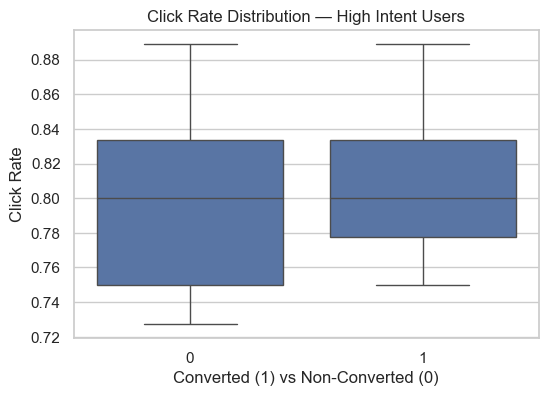

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=high_intent,
    x="target",
    y="click_rate"
)
plt.title("Click Rate Distribution — High Intent Users")
plt.xlabel("Converted (1) vs Non-Converted (0)")
plt.ylabel("Click Rate")
plt.show()

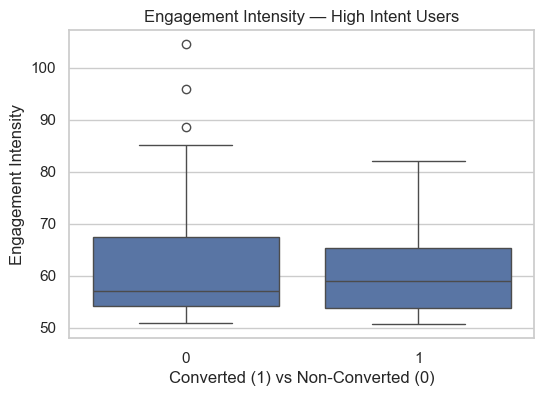

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=high_intent,
    x="target",
    y="engagement_intensity"
)
plt.title("Engagement Intensity — High Intent Users")
plt.xlabel("Converted (1) vs Non-Converted (0)")
plt.ylabel("Engagement Intensity")
plt.show()

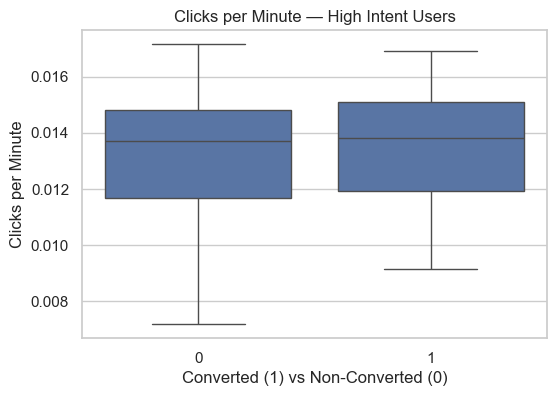

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=high_intent,
    x="target",
    y="clicks_per_minute"
)
plt.title("Clicks per Minute — High Intent Users")
plt.xlabel("Converted (1) vs Non-Converted (0)")
plt.ylabel("Clicks per Minute")
plt.show()

## High-Intent Users: Friction Analysis

To understand why a significant portion of high-intent users fail to convert,
we compared behavioral metrics between:

- **High-intent users who converted**
- **High-intent users who did not convert (friction cases)**

### Key Observation

Despite similar behavioral profiles, conversion outcomes differ significantly.

| Metric | Non-Converting (Friction) | Converting |
|------|----------------------------|------------|
| Click Rate | ~0.80 | ~0.81 |
| Engagement Intensity | ~62 | ~61 |
| Clicks per Minute | ~0.013 | ~0.014 |

### Interpretation

There is **no meaningful behavioral difference** between users who converted and
those who did not within the high-intent segment.

This indicates that:
- Conversion failure is **not driven by lack of interest**
- Users exhibit strong intent and engagement
- The primary bottleneck lies in **product-level friction**, not user behavior

### Product Implication

When high-intent users fail to convert despite strong engagement, likely causes include:
- Unclear or weak call-to-action (CTA)
- Excessive cognitive load before conversion
- Friction in the final conversion step
- Missing trust or reassurance signals

This analysis highlights that improving conversion does not require attracting
different users, but rather **optimizing the conversion experience for users who
are already ready to decide**.